In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("large_twitch_features.csv", sep=";")
df.head()

,views,mature,life_time,numeric_id,dead_account,language,affiliate
0,7879,1,969,0,0,EN,1
1,500,0,2699,1,0,EN,0
2,382502,1,3149,2,0,EN,1
3,386,0,1344,3,0,EN,0
4,2486,0,1784,4,0,EN,0


## 

In [4]:
language_data = df.groupby('language').size().sort_values(ascending=False).head(5).reset_index(name='count')
language_data

,language,count
0,EN,124411
1,DE,9428
2,FR,6799
3,ES,5699
4,RU,4821


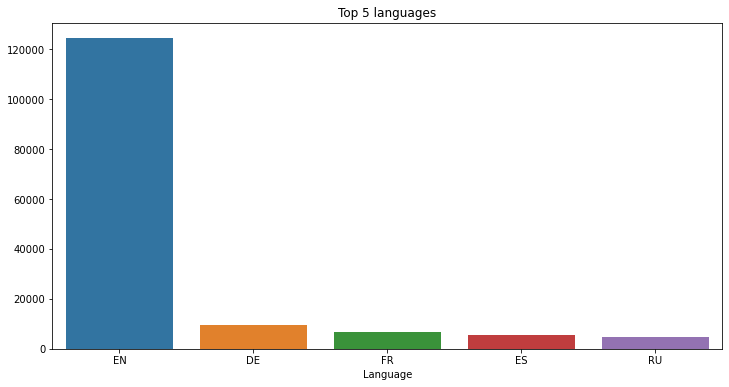

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x='language',y='count',data=language_data)
plt.title('Top 5 languages')
plt.xlabel('Language')
plt.ylabel('');

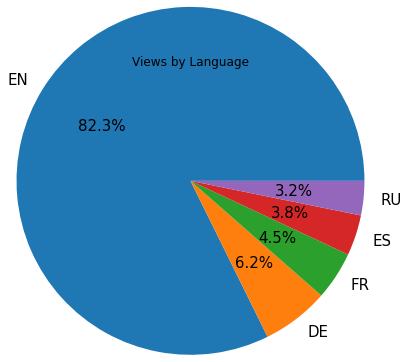

<Figure size 2304x2304 with 0 Axes>

In [6]:
labels = language_data['language']

fig, ax = plt.subplots()
plt.figure(figsize=(32,32))

ax.pie(language_data['count'], labels=labels, autopct='%1.1f%%',  radius=2,textprops={'fontsize':15})
ax.set_title('Views by Language')

plt.show()

## Можно заметить, что пользователей, говорящих на Английском - болшинство

## Посчитаем процентное соотношение партнеров и обычных пользователей

In [7]:
df['affiliate'].value_counts() / df['affiliate'].value_counts().sum() * 100

0    51.493629
1    48.506371
Name: affiliate, dtype: float64

Text(0.5, 1.0, 'Distribution of Affiliate Values')

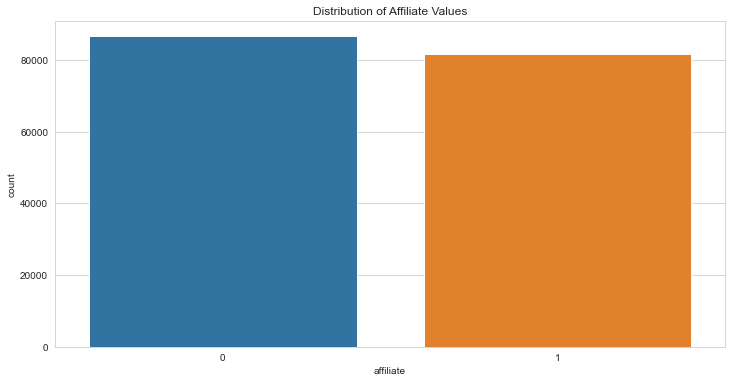

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x='affiliate', data=df)
ax.set_title('Distribution of Affiliate Values')

#counts = df['affiliate'].value_counts()
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
#plt.title('Distribution of Affiliate Values')
#plt.axis('equal')
#plt.show()


## Посчитаем сумму просмотров у партнеров и обычных пользователей

In [9]:
views_not_affiliate = df.loc[df['affiliate'] == 0, 'views'].sum()
views_not_affiliate

29734119026

In [10]:
views_affiliate = df.loc[df['affiliate'] == 1, 'views'].sum()
views_affiliate

1898508098

<AxesSubplot:xlabel='affiliate', ylabel='views'>

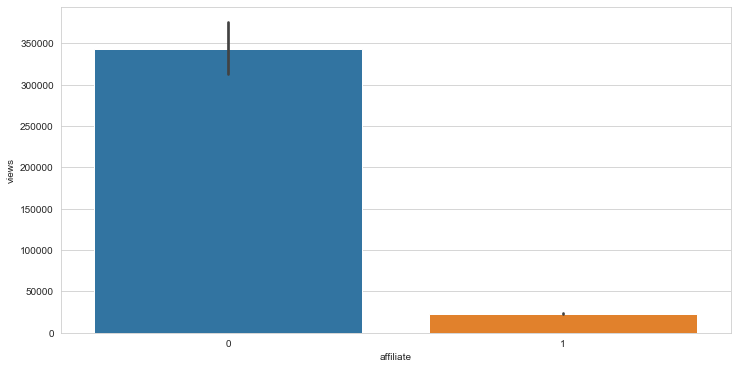

In [11]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='affiliate', y='views', data=df)

<Figure size 576x576 with 0 Axes>

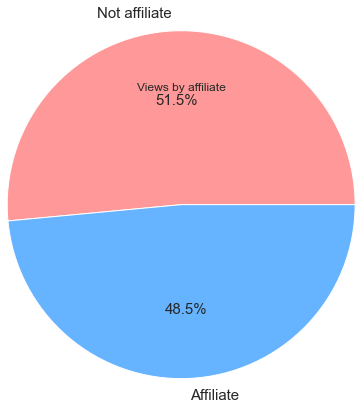

In [12]:
sizes = df['affiliate'].value_counts().values
labels_dict = {0: 'Not affiliate', 1: 'Affiliate'}
labels = [labels_dict[x] for x in df['affiliate'].value_counts().index]
colors = ['#ff9999', '#66b3ff']


plt.figure(figsize=(8,8))
fig, ax = plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors, radius=2, textprops={'fontsize':15})
ax.set_title('Views by affiliate')
plt.show()


In [13]:
df.head()

,views,mature,life_time,numeric_id,dead_account,language,affiliate
0,7879,1,969,0,0,EN,1
1,500,0,2699,1,0,EN,0
2,382502,1,3149,2,0,EN,1
3,386,0,1344,3,0,EN,0
4,2486,0,1784,4,0,EN,0


## Можно заметить, что при большом кол-ве просмотров life_time стремится к 1

In [14]:
df_bots = df.groupby('views')['life_time'].size().reset_index()

(0.0, 3.0)

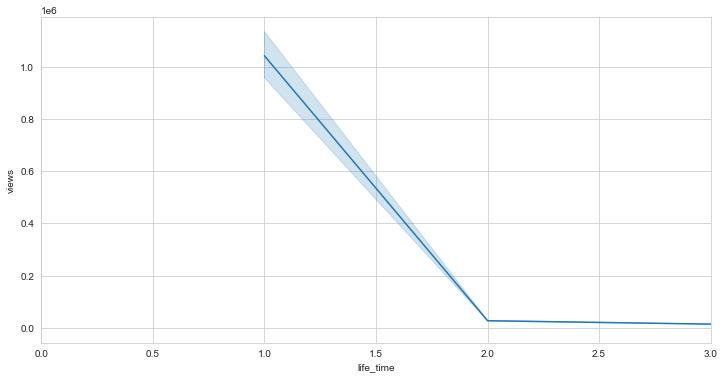

In [15]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='life_time', y='views', data=df.groupby('views')['life_time'].size().reset_index())
ax.set_xlim(0,3)

In [16]:
df_bots.sort_values(by='life_time', ascending=False)

,views,life_time
379,379,54
434,434,51
826,826,51
307,307,50
543,543,50
...,...,...
27653,42528,1
27652,42524,1
27651,42519,1
27650,42512,1


In [17]:
ratio = len(df_bots.loc[df_bots['life_time'] > 1]) / len(df_bots.loc[df_bots['life_time'] == 1])

Text(0, 0.5, 'Ratio')

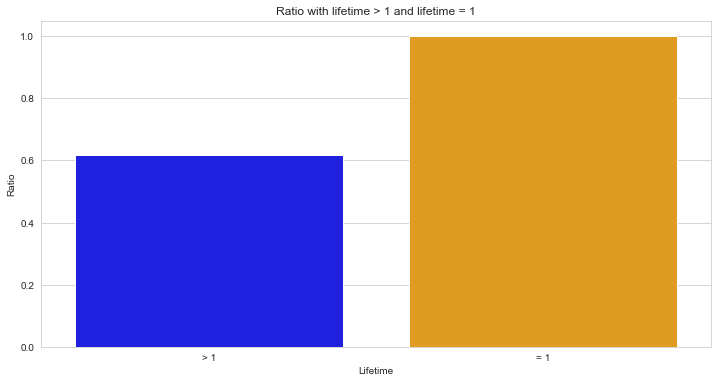

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.barplot(x=['> 1', '= 1'], y=[ratio, 1], palette=['blue', 'orange'])
# Устанавливаем заголовок графика и названия осей
ax.set_title('Ratio with lifetime > 1 and lifetime = 1')
ax.set_xlabel('Lifetime')
ax.set_ylabel('Ratio')

## Проверим dead_account и life_time

In [19]:
views_deadacc = df.groupby('dead_account')['views'].size().reset_index()

<Figure size 576x576 with 0 Axes>

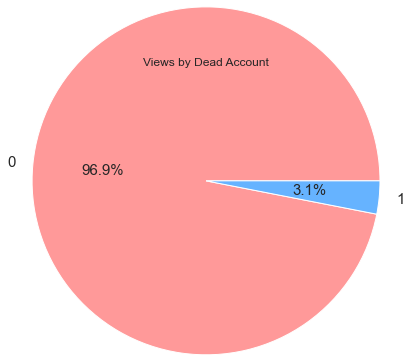

In [20]:
labels = ['Dead Account', 'Not Dead account']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8,8))
fig, ax = plt.subplots()
colors = ['#ff9999', '#66b3ff']
ax.pie(views_deadacc['views'], labels=views_deadacc['dead_account'], colors=colors, autopct='%1.1f%%', radius=2,textprops={'fontsize':15})
ax.set_title('Views by Dead Account')

plt.show()

## Можно заметить, что у "мертвых" аккаунтов количество просмотров намного больше

## Посмотрим на mature и views

In [21]:
views_by_mature = df.groupby('mature')['views'].sum()

<Figure size 576x576 with 0 Axes>

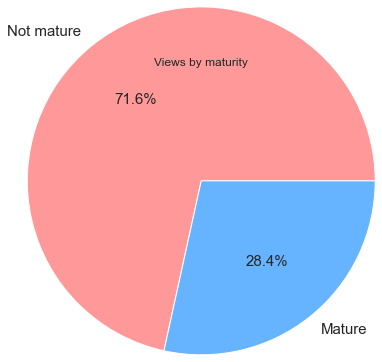

In [22]:
labels = ['Not mature', 'Mature']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
ax.pie(views_by_mature, labels=labels, colors=colors, autopct='%1.1f%%', radius=2, textprops={'fontsize':15})
ax.set_title('Views by maturity')

plt.show()

## Можно заметить, что меньше просмотров у совершеннолетних пользователей

In [23]:
df.head()

,views,mature,life_time,numeric_id,dead_account,language,affiliate
0,7879,1,969,0,0,EN,1
1,500,0,2699,1,0,EN,0
2,382502,1,3149,2,0,EN,1
3,386,0,1344,3,0,EN,0
4,2486,0,1784,4,0,EN,0


## Посмотрим на life-time у пользователей

In [24]:
dead_accs_views = df.groupby('mature')['views'].size().reset_index()

<Figure size 1152x360 with 0 Axes>

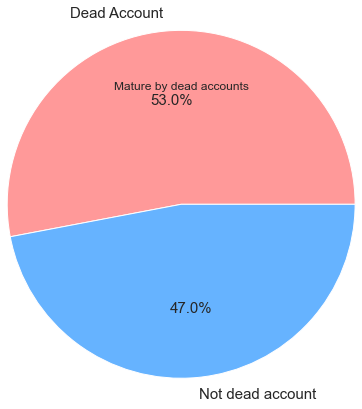

In [37]:
labels = ['Dead Account', 'Not dead account']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(16, 5))
fig, ax = plt.subplots()
ax.pie(dead_accs_views['views'], labels=labels, colors=colors, autopct='%1.1f%%', radius=2, textprops={'fontsize':15})
ax.set_title('Mature by dead accounts')

plt.show()

## Большинство аккаунтов совершеннолетних ушло с площадки

In [26]:
df

,views,mature,life_time,numeric_id,dead_account,language,affiliate
0,7879,1,969,0,0,EN,1
1,500,0,2699,1,0,EN,0
2,382502,1,3149,2,0,EN,1
3,386,0,1344,3,0,EN,0
4,2486,0,1784,4,0,EN,0
...,...,...,...,...,...,...,...
168109,4965,0,810,168109,0,EN,0
168110,4128,1,2080,168110,0,EN,0
168111,3545,0,1797,168111,0,EN,1
168112,892736,1,2135,168112,0,EN,0
